In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns


from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [4]:
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
missing_values = df.isnull().sum()
print(missing_values)

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


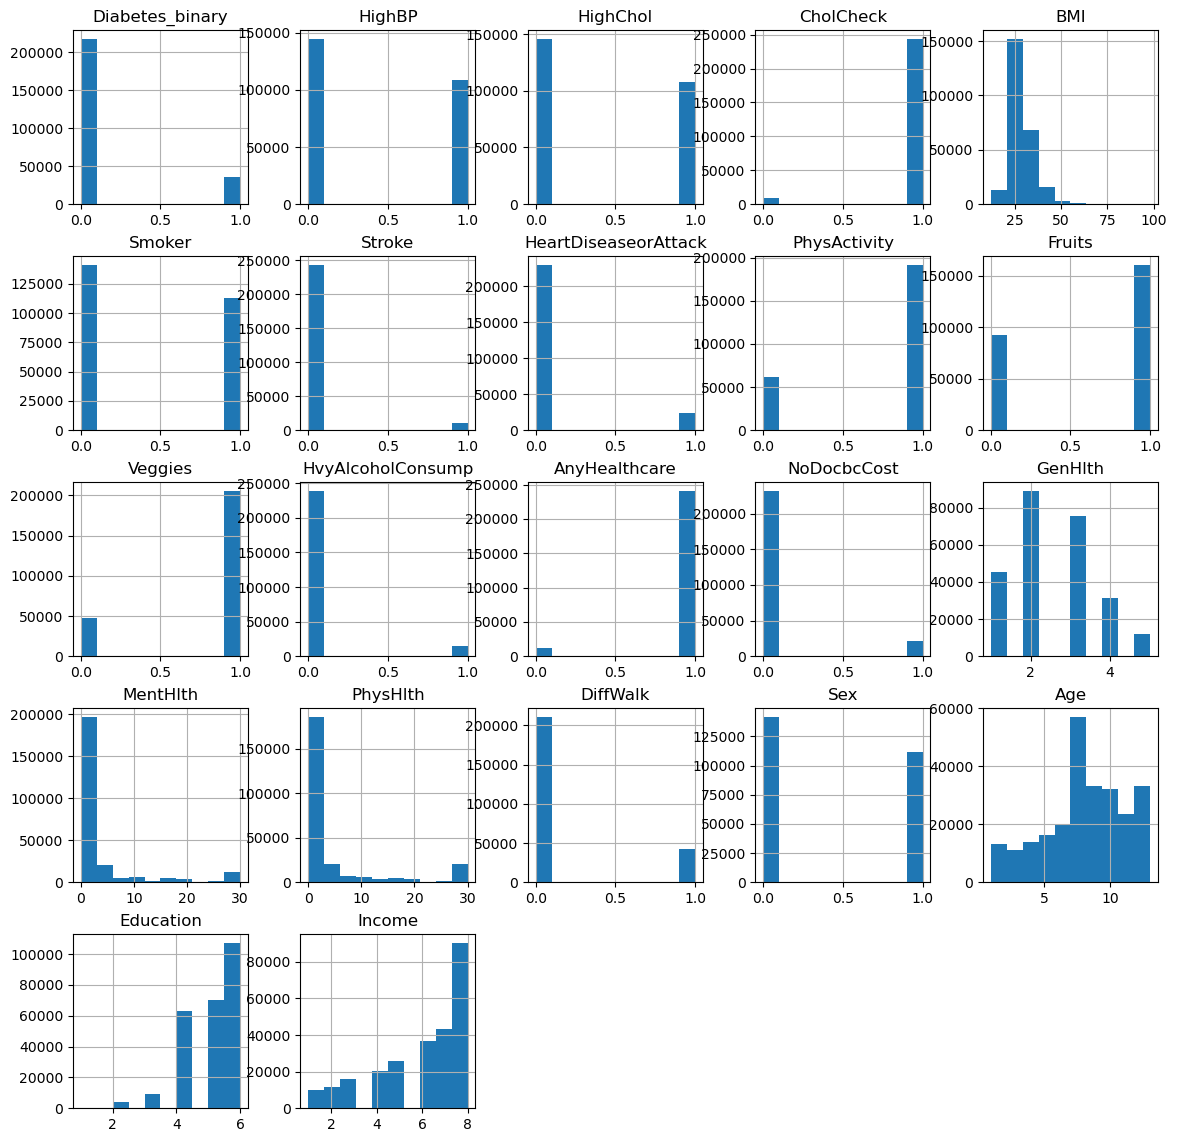

In [7]:
df.hist(figsize = (14,14))

plt.show()

<AxesSubplot:>

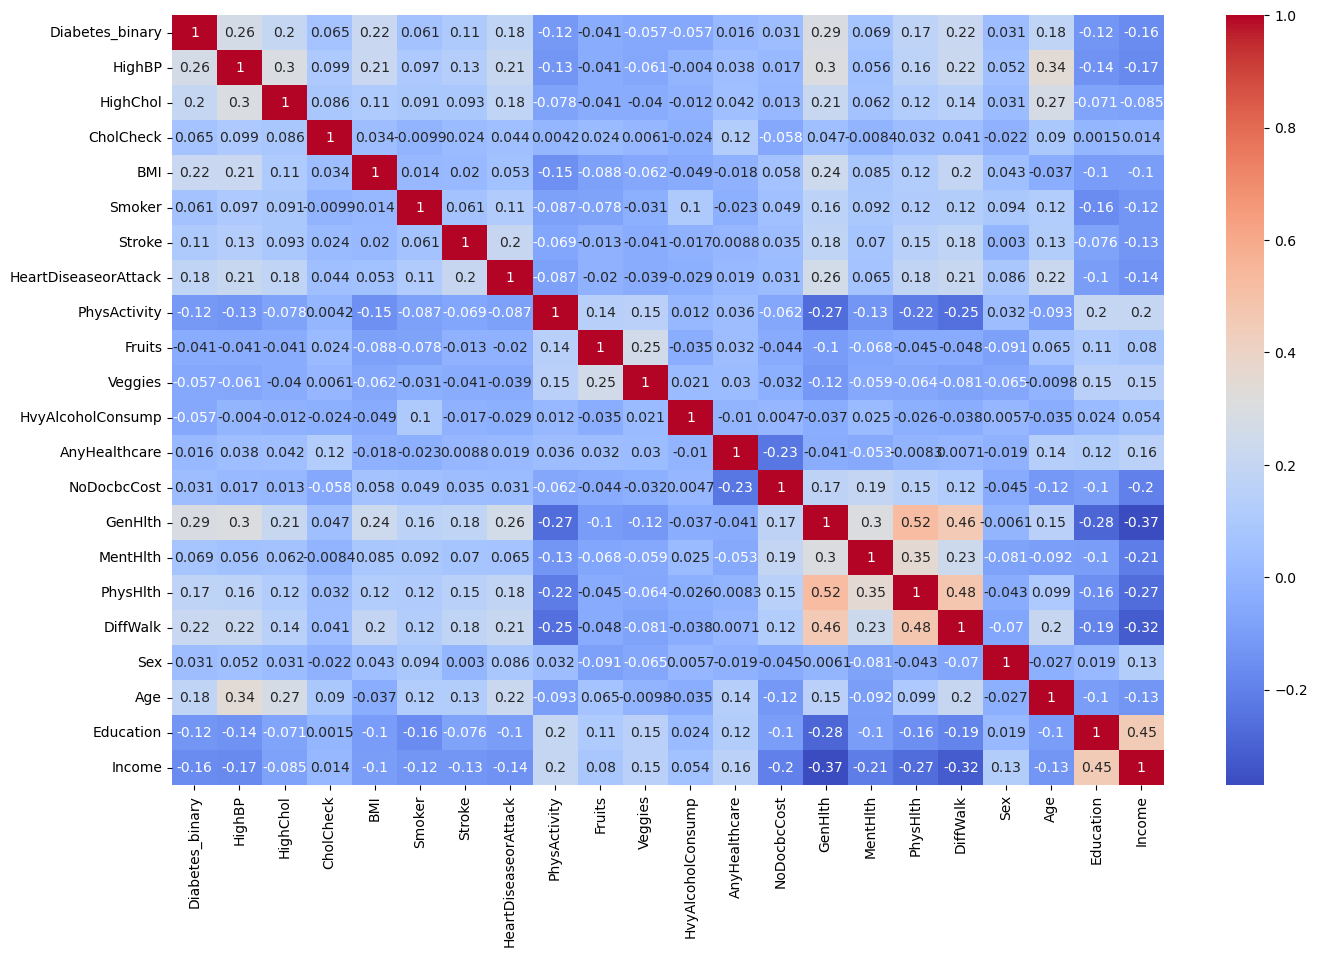

In [29]:
corrmat = df.corr()

plt.figure(figsize = (16,10))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [9]:
X=df.drop("Diabetes_binary",axis=1)
Y=df["Diabetes_binary"]

In [10]:
Y.value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

In [11]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)

In [12]:
x_sm.shape , y_sm.shape

((70692, 21), (70692,))

In [13]:
from sklearn.decomposition import PCA

numerical_features = X.columns

# PCA Principal Component Analysis
pca = PCA()
pca.fit(X)

# 
explained_variance_ratios = pca.explained_variance_ratio_

# 
feature_ranking_pca = pd.DataFrame({'Feature': numerical_features, 'Explained Variance Ratio': explained_variance_ratios})
feature_ranking_pca = feature_ranking_pca.sort_values(by='Explained Variance Ratio', ascending=False)

print('PCA Feature Ranking \n',feature_ranking_pca)

PCA Feature Ranking 
                  Feature  Explained Variance Ratio
0                 HighBP                  0.482711
1               HighChol                  0.220308
2              CholCheck                  0.211243
3                    BMI                  0.047769
4                 Smoker                  0.020935
5                 Stroke                  0.004218
6   HeartDiseaseorAttack                  0.003379
7           PhysActivity                  0.001498
8                 Fruits                  0.001224
9                Veggies                  0.001194
10     HvyAlcoholConsump                  0.001099
11         AnyHealthcare                  0.000865
12           NoDocbcCost                  0.000815
13               GenHlth                  0.000656
14              MentHlth                  0.000482
15              PhysHlth                  0.000385
16              DiffWalk                  0.000379
17                   Sex                  0.000268
18       

In [31]:
pca = PCA(6)

x_pca = pca.fit_transform(x_sm)

In [32]:
x_pca.shape,x_sm.shape

((70692, 6), (70692, 21))

In [33]:
from sklearn.model_selection import train_test_split


X_train , X_test , Y_train , Y_test = train_test_split(x_pca,y_sm, test_size=0.2 , random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

# Different Model


#  Desicion Tree model

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train , Y_train)

DecisionTreeClassifier(max_depth=12)

In [42]:
from sklearn.metrics import accuracy_score
# predictions on test set
y_pred=dt.predict(X_test)

print('Training set score: {:.4f}'.format(dt.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, Y_test)))

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Training set score: 0.8931
Test set score: 0.8612
Accuracy: 0.8612348822406111


In [37]:

matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87      7090
         1.0       0.93      0.78      0.85      7049

    accuracy                           0.86     14139
   macro avg       0.87      0.86      0.86     14139
weighted avg       0.87      0.86      0.86     14139



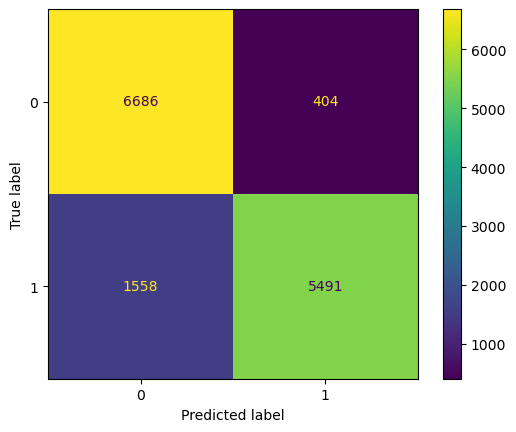

In [38]:
#  the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# 
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

cm_display.plot()
plt.show()


# Rondom Forest


In [47]:

rf = RandomForestClassifier(max_depth=7 ,n_estimators =150, random_state=42 )

# 
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, n_estimators=150, random_state=42)

In [48]:
# 
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

#
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Training set score: 0.8732
Test set score: 0.8715
Accuracy: 0.8714902043991796


In [49]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      7090
         1.0       0.95      0.78      0.86      7049

    accuracy                           0.87     14139
   macro avg       0.88      0.87      0.87     14139
weighted avg       0.88      0.87      0.87     14139



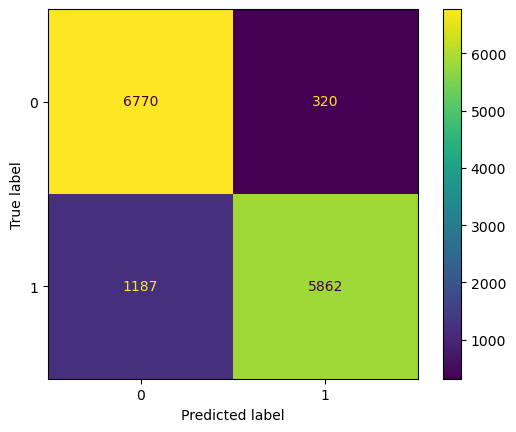

In [26]:
# 
cm = confusion_matrix(Y_test, y_pred)

# 
cm = confusion_matrix(Y_test, y_pred)

# 
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

# 
cm_display.plot()
plt.show()

Random Forest had the overall best score of 0.87 and minumum error, followed by decision tree .   The main features for diabetes prediction according to PCA 

HighBP                  
HighChol                  
CholCheck                                    
BMI                                